<h1><center> Credit Card Fraud Detection </center></h1> 

<h2><center> Chapter 1 : Data exploration </center></h2> 

## Context 


It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

## Content
The datasets consists of transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have **492** frauds out of **284,807** transactions. The dataset is highly unbalanced, the positive class (frauds) account for **0.172%** of all transactions.

It contains only numerical input variables which are the result of a **PCA transformation**. Unfortunately, due to confidentiality issues, the original features and more background information about the data connot be provided. Features **V1, V2, … V28** are the principal components obtained with PCA, the only features which have not been transformed with PCA are '**Time**' and '**Amount**'. Feature '**Time**' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature '**Amount**' is the transaction amount, this feature can be used for example-dependant cost-senstive learning. Feature '**Class**' is the response variable and it takes value **1** in case of fraud and **0** otherwise.

The dataset can be found on **Kaggle** website : https://www.kaggle.com/mlg-ulb/creditcardfraud


## Data exploration : statistics and visualizations

Let's start creating **statistics and visualizations** on my Data Set to identify good columns for modeling, potential data quality issues and anticipate potential feature transformations necessary.

### Importing Needed packages

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
from matplotlib import gridspec
%matplotlib inline

In [6]:
# Import Data into IBM's Watson Studio
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_84b0ff1823ab47db8f9e6aaaf1af72b0 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='JEMi_wmafQCsJME_C0BjJpnQSoDSi6xu9VgwHGN8I8FO',
    ibm_auth_endpoint="https://iam.eu-gb.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_84b0ff1823ab47db8f9e6aaaf1af72b0.get_object(Bucket='courseraml-donotdelete-pr-lavjj7apvyxhwu',Key='creditcard.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

ccfd = pd.read_csv(body)

In [7]:
# Start exploring the dataset
print(ccfd.columns)

ccfd.head(5)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [36]:
# Print the shape of the data
print(ccfd.dtypes)
print(ccfd.shape)
print(ccfd.describe())

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object
(284807, 31)
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.5

In [35]:
# Now we will check to see if there are any NaN or missing values
## percent missing values per columns

(ccfd.isna().sum()/ccfd.shape[0])*100

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

No missing values found

In [43]:
# Verifier the number of distinct classes 
ccfd['Class'].nunique()

2

As expected, there are only 2 classes.

Text(0, 0.5, 'Distribution')

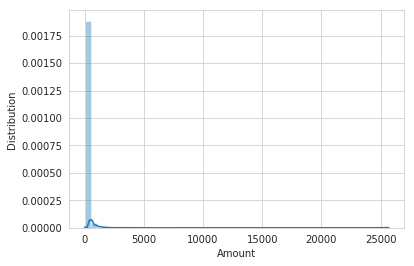

In [13]:
# Distribution of Amount

amount = [ccfd['Amount'].values]
sns.distplot(amount)
plt.xlabel('Amount')
plt.ylabel('Distribution')

Text(0, 0.5, 'Distribution')

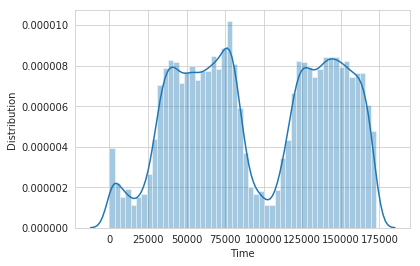

In [15]:
# Distribution of Time

time = ccfd['Time'].values
sns.distplot(time)
plt.xlabel('Time')
plt.ylabel('Distribution')

Now we will be visualizing all the features from the dataset on graphs.

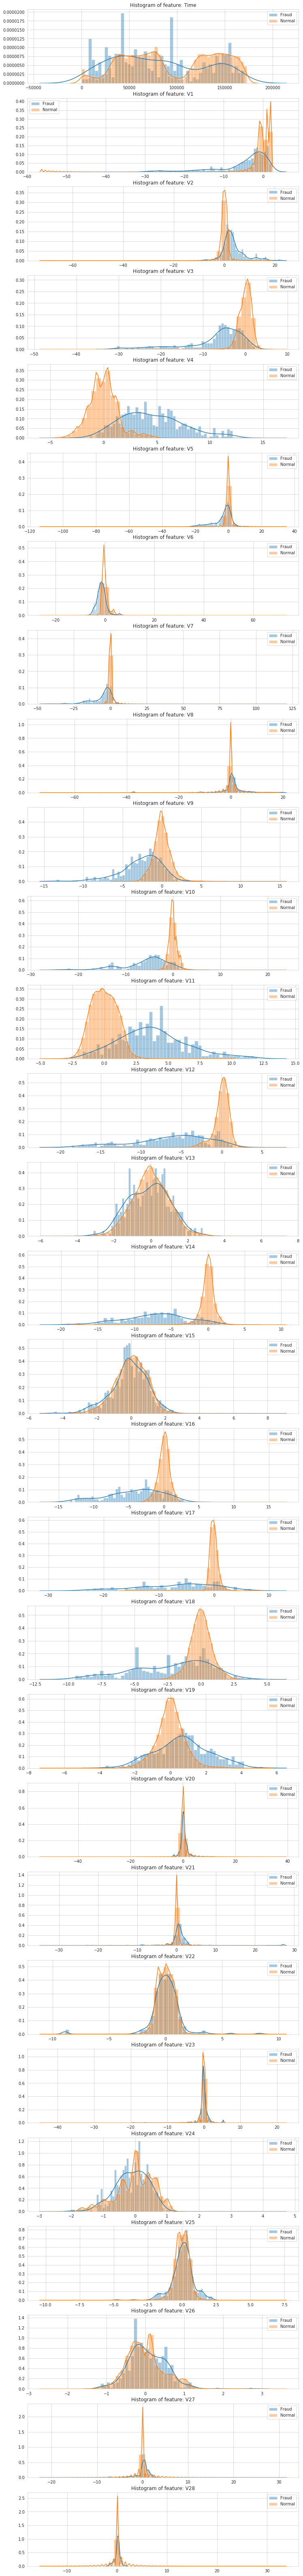

In [30]:
# Distribution of anomalous features

features = ccfd.iloc[:,0:29].columns

plt.figure(figsize=(12,29*4))
gs = gridspec.GridSpec(29, 1)
for i, c in enumerate(ccfd[features]):
    ax = plt.subplot(gs[i])
    sns.distplot(ccfd[c][ccfd.Class == 1], bins=50)
    sns.distplot(ccfd[c][ccfd.Class == 0], bins=50)
    ax.legend(labels=['Fraud','Normal'])
    ax.set_xlabel('')
    ax.set_title('Histogram of feature: ' + str(c))
plt.show()

Let’s separate the Fraudulent cases from the normal ones and compare their occurrences in the dataset.

In [47]:
# Determine number of fraud cases in dataset
ccfd.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [59]:
Fraud = ccfd[ccfd['Class'] == 1]
Normal = ccfd[ccfd['Class'] == 0]
outlier_fraction = len(Fraud)/float(len(Valid))*100
print("Percentage of fraudulent cases = " + str(outlier_fraction) + "%")

Percentage of fraudulent cases = 0.17304750013189596%


Fraud There is only 0.17% fraudulent transaction out all the transactions. The data is highly Unbalanced. 

In [48]:
print("Amount details of fradulent transacation")
Fraud.Amount.describe()

Amount details of fradulent transacation


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [49]:

print("Amount details of Normal transaction")
Valid.Amount.describe()

Amount details of Normal transaction


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

As we can clearly notice from this, the average Money transaction for the fraudulent ones are more. This makes this problem crucial to deal with.


Correlation matrix graphically gives us an idea of how features correlate with each other and can help us predict what are the features that are most relevant for the prediction.

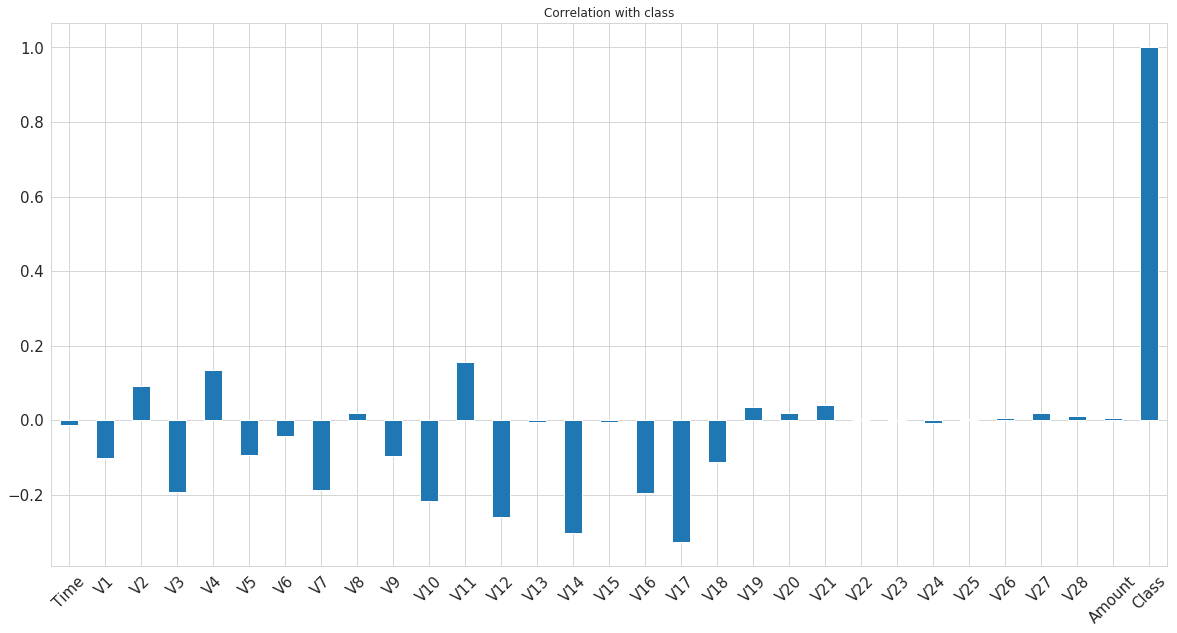

In [50]:
# Correlation with class

ccfd.corrwith(ccfd.Class).plot.bar(
        figsize = (20, 10), title = "Correlation with class", fontsize = 15,
        rot = 45, grid = True)

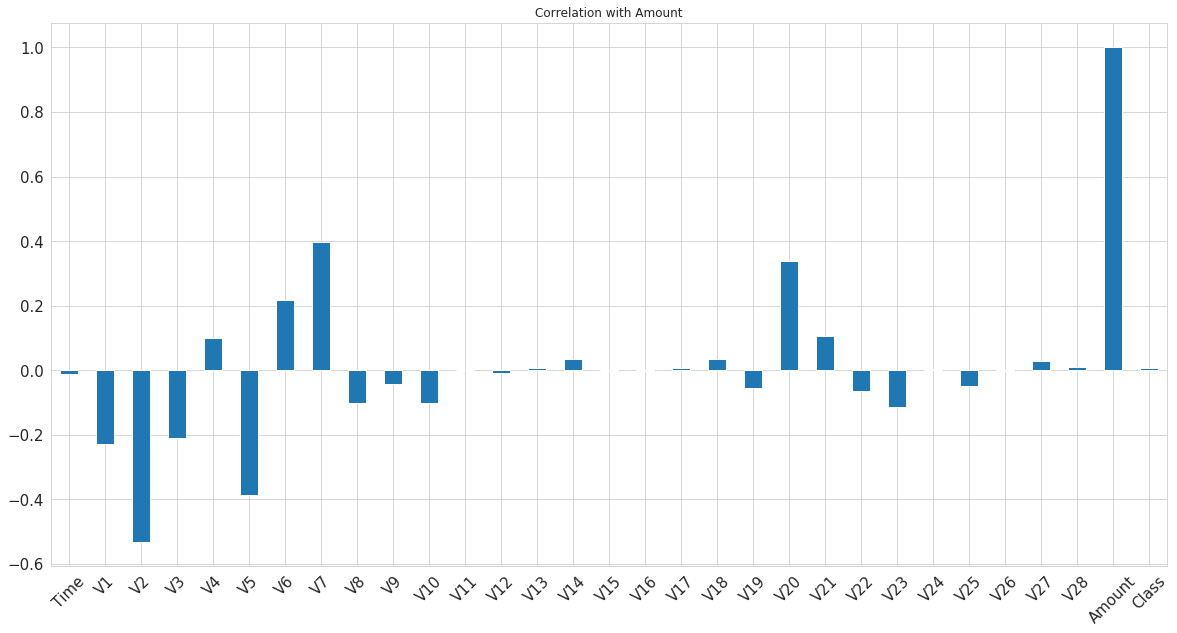

In [60]:
# Correlation with Amount

ccfd.corrwith(ccfd.Amount).plot.bar(
        figsize = (20, 10), title = "Correlation with Amount", fontsize = 15,
        rot = 45, grid = True)

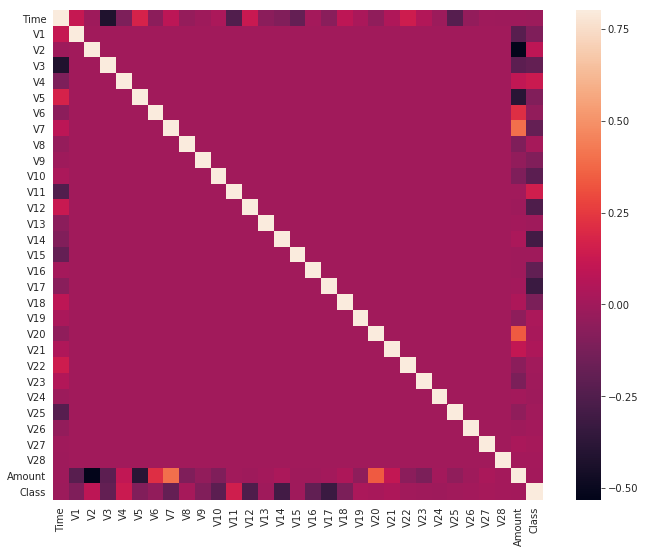

In [41]:
# Correlation matrix

corrmat = ccfd.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In the HeatMap we can clearly see that most of the features do not correlate to other features but there are some features that either has a positive or a negative correlation with each other. For example “V2” and “V5” are highly negatively correlated with the feature called “Amount”. We also see that “V7” and “V20” are positively correlated with “Amount”. This gives us a deeper understanding of the Data available to us.